In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [2]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyanadupletsa/Documents/PhDThesisPlots/matplotlibrc')

mpl.rc('xtick', labelsize = 20) 
mpl.rc('ytick', labelsize = 20)

In [3]:
colors = ['#2a9d8f', '#2a9d8f', '#e76f51', '#e76f51', '#eba75f', '#eba75f', '#2f4f4f', '#2f4f4f']

In [4]:
def apply_alpha(hex_color, alpha=0.1, bg_color=(1, 1, 1)):
    rgb = mcolors.hex2color(hex_color)  # Convert hex to RGB
    blended_rgb = [(1 - alpha) * bg + alpha * fg for bg, fg in zip(bg_color, rgb)]
    return mcolors.to_hex(blended_rgb)

In [5]:
colors_alpha = [apply_alpha(c) for c in colors]

In [6]:
PATH_TO_DATA = '/Users/ulyanadupletsa/Documents/KN/results_10years/'

In [7]:
detectors_ntw = ['ET_2L_15_cryo_45deg_2CE','ET_delta_10_cryo_2CE','ET_2L_15_cryo_45deg_1CE',
'ET_delta_10_cryo_1CE','ET_2L_15_cryo_45deg_LVKI','ET_2L_15_cryo_45deg','ET_delta_10_cryo_LVKI',
'ET_delta_10_cryo']

lbs_list = ['ET-2L+2CE', 'ET-$\Delta$+2CE', 'ET-2L+1CE', 'ET-$\Delta$+1CE',
'ET-2L+LVKI', 'ET-2L', 'ET-$\Delta$+LVKI', 'ET-$\Delta$']
				

lbs = ['network_SNR', 'mass_1', 'mass_2', 'luminosity_distance', 'dec', 'ra', 'theta_jn',
	   'psi', 'geocent_time', 'phase', 'redshift', 'lambda_1', 'lambda_2', 'err_mass_1', 
	   'err_mass_2', 'err_luminosity_distance', 'err_dec', 'err_ra', 'err_theta_jn',
	   'err_psi', 'err_geocent_time', 'err_phase', 'err_lambda_1', 'err_lambda_2', 'err_sky_location']

In [8]:
alpha = '1.0'
eos = 'BLh_uniform'
params = ['network_SNR', 'luminosity_distance', 'theta_jn', 'mass_1', 'lambda_1']
xaxis_lbs_list = ['network SNR', '$\Delta d_L/d_L$', '$\Delta \iota/\iota$', '$\Delta m_1/m_1$', '$\Delta \Lambda_1/\Lambda_1$']

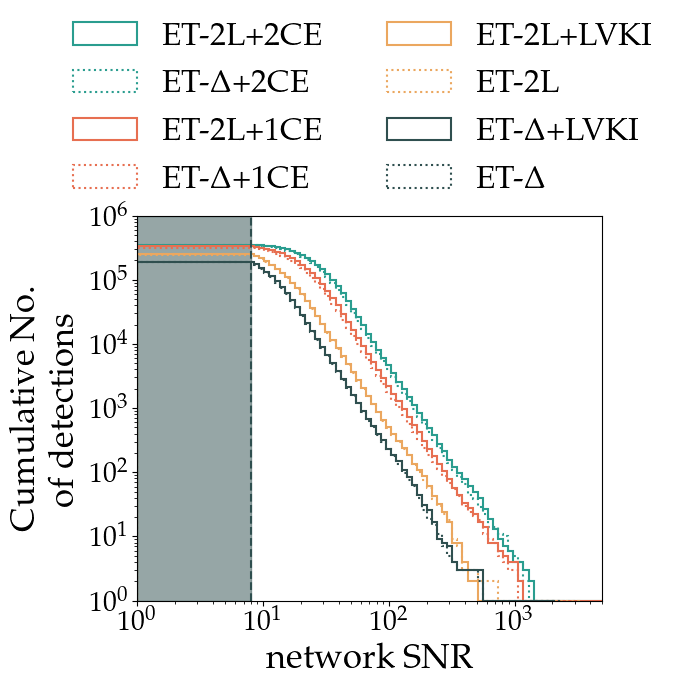

In [9]:
# plot cumulative histograms of SNR 
fig, ax = plt.subplots(1,1,figsize = (6, 5))
my_linewidth = 1.5

for i in range(len(detectors_ntw)):
    df = pd.read_csv('%s/%s/%s/%s/Errors_%s_%s_%s.txt' %(str(PATH_TO_DATA), str(alpha), str(eos), 
                        str(detectors_ntw[i]), str(alpha), str(eos), str(detectors_ntw[i])),
                        names = lbs, skiprows = 1, delimiter = ' ')
    df = df.dropna()

    if i%2 == 0:
        my_linestyle = 'solid'
    else:
        my_linestyle = 'dotted'

    # SNR
    ax.hist(df['network_SNR'], bins = np.logspace(0, 4, 100), cumulative = -1, color = colors_alpha[i], histtype='step', 
                linestyle=my_linestyle, edgecolor=colors[i], linewidth=my_linewidth)
    ax.set_ylabel('Cumulative No. \n of detections', fontsize = 25)
    ax.set_xlabel(xaxis_lbs_list[0], fontsize = 25)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(1, 5*10**3)
    ax.set_ylim(1, 10**6)
    
snr_thr = 8.
ax.axvspan(1, snr_thr, alpha=0.5, color=colors[-1])
ax.axvline(x=snr_thr, linestyle='dashed', color=colors[-1])

fig.legend(lbs_list, loc='upper center', fontsize=23, ncols=2, bbox_to_anchor=(0.5, 1.325), frameon=False)
plt.savefig('plots/kn_snr_alpha%s_%s.pdf' %(alpha, eos), bbox_inches='tight')
plt.show()